In [23]:
# Recurrent Neural Network
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Part 1 - Data Preprocessing
dataset_train = pd.read_csv('Google_Stock_Price_Train_10_year.csv') 
training_set = dataset_train.iloc[:,1:2].values

# Feature scaling
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train = [] # empty list
y_train = [] # empty list

for i in range(60, 3906):
    X_train.append(training_set_scaled[i-60:i, 0]) # gives the 60 previous stock prices
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1) ) # change shape for RNN input

In [24]:
# Part 2 - Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()
# input
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), dropout=0.2))
# regressor.add(Dropout(0.2))

# hidden layer don't need to specify input for hidden layer
regressor.add(LSTM(units=50, return_sequences=True, dropout=0.2))

# hidden layer don't need to specify input for hidden layer
regressor.add(LSTM(units=50, return_sequences=True, dropout=0.2))

# hidden layer don't need to specify input for hidden layer
regressor.add(LSTM(units=50, return_sequences=True, dropout=0.2))

# hidden layer don't need to specify input for hidden layer
regressor.add(LSTM(units=50, return_sequences=True, dropout=0.2))

# hidden layer because not returning anymore sequences
regressor.add(LSTM(units=50, dropout=0.2))

# output layer fully connected output layer
regressor.add(Dense(units=1))

# compiling the ANN
regressor.compile(optimizer='adam', loss='mean_squared_error')


regressor.fit(X_train, y_train, epochs=100, batch_size=32, workers=4, use_multiprocessing=True)

Epoch 1/100
3846/3846 [==============================] - 36s 9ms/step - loss: 0.0310
Epoch 2/100
3846/3846 [==============================] - 30s 8ms/step - loss: 0.0172
Epoch 3/100
3846/3846 [==============================] - 30s 8ms/step - loss: 0.0151
Epoch 4/100
3846/3846 [==============================] - 31s 8ms/step - loss: 0.0120
Epoch 5/100
3846/3846 [==============================] - 31s 8ms/step - loss: 0.0131
Epoch 6/100
3846/3846 [==============================] - 31s 8ms/step - loss: 0.0119
Epoch 7/100
3846/3846 [==============================] - 31s 8ms/step - loss: 0.0112
Epoch 8/100
3846/3846 [==============================] - 32s 8ms/step - loss: 0.0116
Epoch 9/100
3846/3846 [==============================] - 32s 8ms/step - loss: 0.0105
Epoch 10/100
3846/3846 [==============================] - 32s 8ms/step - loss: 0.0108
Epoch 11/100
3846/3846 [==============================] - 32s 8ms/step - loss: 0.0097
Epoch 12/100
3846/3846 [==============================] - 32s 8

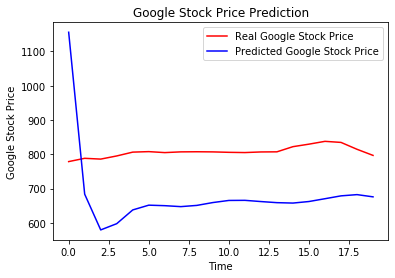

In [30]:
# Part 3 - Making the predictions and visualising the results# 

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
